## Importing packages

In [53]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from sklearn.metrics import silhouette_score

print('Libraries imported.')

Libraries imported.


# 1. Getting the list of neighborhoods and their geographical coordinates

In [92]:
#This will not run on online IDE
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Shanghai"
# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse the html content
soup = BeautifulSoup(html_content, "lxml")
#print(soup.prettify()) # print the parsed data of html

print (soup.title.text)
table = soup.find("table", attrs={"class": "wikitable collapsible"})

table_rows = table.find_all("tr") 



Shanghai - Wikipedia
[]
done


In [134]:
print(table_rows[4].find_all("th")+table_rows[4].find_all("td"))

[<th>310101</th>, <th><a href="/wiki/Huangpu_District,_Shanghai" title="Huangpu District, Shanghai">Huangpu</a>
</th>, <td>20.46</td>, <td>654,800</td>, <td>Waitan Subdistrict</td>, <td>200001
</td>]


In [157]:

# Get all the headings and rows of Lists

table = []
for tr in table_rows[2:]:
    row =[]
    for td in tr.find_all("th")+tr.find_all("td"):
        try:
            # remove any newlines and extra spaces from left and right
            #print(td.text.replace('\n', ' ').strip())
            row.append(td.text.replace('\n', ' ').strip())
        except BaseException as e:
            print("something is wrong:"),e

    #print(table_rows[1])
    table.append(row)
    
#print (table)
print(table[1])

['310000', 'Shanghai', '6340.50', '24,183,300', 'Huangpu', '200000']


In [161]:
df = pd.DataFrame(table[1:], columns = table[0])
#df = df.append(table[1:],ignore_index = True)
df.rename(columns={"Division":"Neighborhood"},inplace = True)
df

,Division code[110],Neighborhood,Area (km2)[111],Total population 2017[111],Seat,Postal code
0,310000,Shanghai,6340.50,"24,183,300",Huangpu,200000
1,310101,Huangpu,20.46,"654,800",Waitan Subdistrict,200001
2,310104,Xuhui,54.76,"1,088,300",Xujiahui Subdistrict,200030
3,310105,Changning,38.30,"693,700",Jiangsu Road Subdistrict,200050
4,310106,Jing'an,36.88,"1,066,200",Jiangning Road Subdistrict,200040
5,310107,Putuo,54.83,"1,284,700",Zhenru Town Subdistrict,200333
6,310109,Hongkou,23.46,"799,000",Jiaxing Road Subdistrict,200080
7,310110,Yangpu,60.73,"1,313,400",Pingliang Road Subdistrict,200082
8,310112,Minhang,370.75,"2,534,300",Xinzhuang town,201100
9,310113,Baoshan,270.99,"2,030,800",Youyi Road Subdistrict,201900


In [163]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Marrakech_food")

df['Coord']= df['Neighborhood'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Coord'].apply(pd.Series)

df.drop(['Coord'], axis=1, inplace=True)

shanghai_data = df
shanghai_data

,Division code[110],Neighborhood,Area (km2)[111],Total population 2017[111],Seat,Postal code,Latitude,Longitude
0,310000,Shanghai,6340.50,"24,183,300",Huangpu,200000,31.232276,121.469207
1,310101,Huangpu,20.46,"654,800",Waitan Subdistrict,200001,31.233593,121.479864
2,310104,Xuhui,54.76,"1,088,300",Xujiahui Subdistrict,200030,31.163698,121.427994
3,310105,Changning,38.30,"693,700",Jiangsu Road Subdistrict,200050,31.209276,121.389986
4,310106,Jing'an,36.88,"1,066,200",Jiangning Road Subdistrict,200040,45.408600,123.132716
5,310107,Putuo,54.83,"1,284,700",Zhenru Town Subdistrict,200333,31.251326,121.391229
6,310109,Hongkou,23.46,"799,000",Jiaxing Road Subdistrict,200080,31.266703,121.501751
7,310110,Yangpu,60.73,"1,313,400",Pingliang Road Subdistrict,200082,31.262011,121.521430
8,310112,Minhang,370.75,"2,534,300",Xinzhuang town,201100,31.114767,121.376943
9,310113,Baoshan,270.99,"2,030,800",Youyi Road Subdistrict,201900,31.406634,121.485158


## Let's get the geographical coordinates of Shanghai

In [164]:
address = 'Shanghai'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Shanghai are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Shanghai are 31.2322758, 121.4692071.


## Let's visualize Shanghai and the neighborhoods in it.

In [166]:
# create map of Shanghai using latitude and longitude values
map_shanghai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(shanghai_data['Latitude'], shanghai_data['Longitude'], shanghai_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shanghai)  
    
map_shanghai

## Defining Foursquare Credentials and Version

In [167]:
CLIENT_ID = 'EQG4WGKSW2UTHTSNIL1IM0MMJTNY4RN3ESAF0VQO1XE5CNI4' # your Foursquare ID
CLIENT_SECRET = 'AJSRXBB10THVQCT1XW3NQPACQPPKFHER5ZNXFXGJ43U355GX' # your Foursquare Secret

VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EQG4WGKSW2UTHTSNIL1IM0MMJTNY4RN3ESAF0VQO1XE5CNI4
CLIENT_SECRET:AJSRXBB10THVQCT1XW3NQPACQPPKFHER5ZNXFXGJ43U355GX


# 2.  Exploring the neigborhoods in Shanghai

In [180]:
def getNearbyVenues(names, latitudes, longitudes, radius=30000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [181]:
shanghai_venues = getNearbyVenues(names=shanghai_data['Neighborhood'],
                                   latitudes=shanghai_data['Latitude'],
                                   longitudes=shanghai_data['Longitude']
                                  )
shanghai_venues                                  

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Shanghai,31.232276,121.469207,JW Marriott Hotel Shanghai at Tomorrow Square ...,31.232216,121.465260,Hotel
1,Shanghai,31.232276,121.469207,Shanghai Grand Theater (上海大剧院),31.231030,121.467263,Theater
2,Shanghai,31.232276,121.469207,Homeslice,31.225189,121.461093,Pizza Place
3,Shanghai,31.232276,121.469207,The Peninsula Shanghai,31.243049,121.484564,Hotel
4,Shanghai,31.232276,121.469207,The Bund (外滩),31.239316,121.486065,Waterfront
5,Shanghai,31.232276,121.469207,Starbucks Reserve Roastery (星巴克臻选),31.232402,121.457684,Coffee Shop
6,Shanghai,31.232276,121.469207,Fraser Residence Shanghai,31.225639,121.476177,Hotel
7,Shanghai,31.232276,121.469207,Goodfellas,31.234878,121.486730,Italian Restaurant
8,Shanghai,31.232276,121.469207,Din Tai Fung (鼎泰丰),31.230923,121.458491,Dumpling Restaurant
9,Shanghai,31.232276,121.469207,Le Royal Club Lounge,31.236404,121.471364,Lounge


## Creating a Data-Frame of Restaurants venues only

In [208]:
shanghai_restaurant_venues = shanghai_venues[shanghai_venues['Venue Category'].str.contains('Restaurant|Coffee|Noodle|Bar|Breakfast|Bakery|Café|Steak|Pizza|Sandwich|Tea|Food|Seafood|Buffet|Dumpling')].reset_index(drop=True)
shanghai_restaurant_venues.index = np.arange(1, len(shanghai_restaurant_venues )+1)

shanghai_restaurant_venues

category_ranking = shanghai_restaurant_venues['Venue Category'].value_counts().to_frame(name='Frequency')

category_ranking


,Frequency
Coffee Shop,101
Bakery,48
Italian Restaurant,34
Dumpling Restaurant,32
Hotel Bar,31
French Restaurant,28
Cocktail Bar,25
Shanghai Restaurant,22
Japanese Restaurant,20
Chinese Restaurant,16


In [256]:
num_category = len(shanghai_restaurant_venues['Venue Category'].unique())
print('There are {} distinct restaurant types in Shanghai.'.format(num_category))

There are 40 distinct restaurant types in Shanghai.


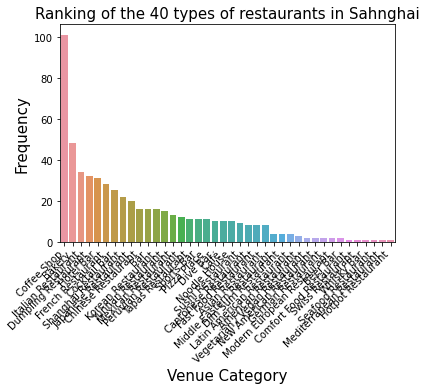

In [199]:
import seaborn as sns
from matplotlib import pyplot as plt

category_ranking

s=sns.barplot(x=category_ranking.index, y="Frequency", data=category_ranking)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

#plt.figure(figsize=(20,10))
plt.title('Ranking of the 40 types of restaurants in Sahnghai', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("restaurant_venues_ranking.png", dpi=300)


## Analysis of each Neighborhood

In [217]:
# one hot encoding
shanghai_onehot = pd.get_dummies(shanghai_restaurant_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
shanghai_onehot['Neighborhood'] = shanghai_restaurant_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [shanghai_onehot.columns[-1]] + list(shanghai_onehot.columns[:-1])
shanghai_onehot = shanghai_onehot[fixed_columns]

#shanghai_onehot['Population'] = shanghai_data['Total population 2017[111]']

#shanghai_onehot['Bakery'].sum()
shanghai_onehot

,Neighborhood,American Restaurant,Asian Restaurant,Bakery,Bar,Beer Bar,Café,Cantonese Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Dim Sum Restaurant,Dive Bar,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Hotel Bar,Hotpot Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Noodle House,Peruvian Restaurant,Pizza Place,Seafood Restaurant,Shanghai Restaurant,Sports Bar,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Yunnan Restaurant
1,Shanghai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Shanghai,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Shanghai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Shanghai,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Shanghai,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Shanghai,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Shanghai,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Shanghai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Shanghai,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Shanghai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Next, let's group rows by neighborhood and by taking the ratio of the frequency to population of occurrence of each category

In [242]:
shanghai_grouped = shanghai_onehot.groupby('Neighborhood').sum().reset_index()
shanghai_grouped['Population'] = shanghai_data['Total population 2017[111]']

shanghai_grouped_density= shanghai_grouped.loc[:,"American Restaurant":"Yunnan Restaurant"]
    .div(shanghai_grouped['Population']
    .str.replace(',', '')
    .astype(float), axis=0)*1000000
    
shanghai_grouped_density.insert(0,'Neighborhood','value')
shanghai_grouped_density['Neighborhood'] = shanghai_grouped['Neighborhood']

shanghai_grouped_density

,Neighborhood,American Restaurant,Asian Restaurant,Bakery,Bar,Beer Bar,Café,Cantonese Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Dim Sum Restaurant,Dive Bar,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Hotel Bar,Hotpot Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Noodle House,Peruvian Restaurant,Pizza Place,Seafood Restaurant,Shanghai Restaurant,Sports Bar,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Vegetarian / Vegan Restaurant,Whisky Bar,Yunnan Restaurant
0,Baoshan,0.000000,0.000000,0.082702,0.041351,0.000000,0.082702,0.041351,0.000000,0.082702,0.206754,0.000000,0.041351,0.000000,0.124053,0.000000,0.124053,0.000000,0.206754,0.041351,0.124053,0.000000,0.000000,0.000000,0.041351,0.000000,0.041351,0.041351,0.000000,0.000000,0.041351,0.041351,0.000000,0.082702,0.041351,0.000000,0.000000,0.041351,0.041351,0.000000,0.041351
1,Changning,0.000000,1.527184,7.635919,1.527184,0.000000,0.000000,0.000000,1.527184,3.054368,7.635919,0.000000,1.527184,1.527184,4.581552,0.000000,3.054368,0.000000,1.527184,0.000000,3.054368,3.054368,3.054368,1.527184,0.000000,1.527184,0.000000,0.000000,0.000000,1.527184,1.527184,1.527184,0.000000,3.054368,1.527184,1.527184,0.000000,1.527184,0.000000,0.000000,1.527184
2,Chongming,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.756593,0.000000,0.000000,0.000000,0.000000,0.918864,0.000000,0.000000,0.000000,0.000000,0.000000,0.918864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.918864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Fengxian,0.000000,0.000000,1.441545,0.000000,0.000000,1.441545,0.000000,2.883091,0.000000,18.740089,0.000000,0.000000,0.000000,0.000000,7.207727,0.000000,0.000000,0.000000,0.000000,1.441545,0.000000,4.324636,0.000000,0.000000,1.441545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Hongkou,0.000000,0.000000,3.751641,0.937910,0.000000,0.937910,0.937910,0.000000,1.875821,5.627462,0.000000,0.000000,0.937910,1.875821,0.000000,2.813731,0.000000,3.751641,0.000000,2.813731,0.000000,0.000000,0.000000,0.000000,0.937910,0.937910,0.000000,0.000000,0.000000,0.937910,0.937910,0.000000,1.875821,0.937910,0.000000,0.000000,0.937910,0.000000,0.000000,0.937910
5,Huangpu,0.778392,0.000000,2.335176,0.778392,0.000000,0.778392,0.778392,0.000000,2.335176,4.670351,0.000000,0.000000,0.778392,1.556784,0.000000,2.335176,0.000000,3.113567,0.000000,2.335176,0.000000,0.000000,0.000000,0.000000,1.556784,0.000000,0.000000,0.000000,0.000000,0.778392,0.778392,0.000000,1.556784,0.778392,0.000000,0.000000,0.778392,0.000000,0.000000,0.778392
6,Jiading,0.000000,1.251564,3.754693,2.503129,0.000000,0.000000,1.251564,1.251564,1.251564,6.257822,0.000000,1.251564,0.000000,3.754693,0.000000,1.251564,1.251564,1.251564,0.000000,3.754693,2.503129,1.251564,0.000000,0.000000,0.000000,1.251564,0.000000,0.000000,1.251564,1.251564,1.251564,0.000000,2.503129,1.251564,1.251564,0.000000,1.251564,0.000000,0.000000,2.503129
7,Jing'an,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.761383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Jinshan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.578345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

#### Let's print each neighborhood along with the ordered list of restaurant venues compare to population (ascending density)


In [260]:
num_top_venues = num_category

for hood in shanghai_grouped_density['Neighborhood']:
    print("----"+hood+"----")
    temp = shanghai_grouped_density[shanghai_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=True).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baoshan----
                            venue  freq
0             American Restaurant  0.00
1       Latin American Restaurant  0.00
2               Korean Restaurant  0.00
3             Japanese Restaurant  0.00
4                      Whisky Bar  0.00
5         New American Restaurant  0.00
6               German Restaurant  0.00
7                    Noodle House  0.00
8            Fast Food Restaurant  0.00
9         Comfort Food Restaurant  0.00
10                       Dive Bar  0.00
11             Chinese Restaurant  0.00
12               Sushi Restaurant  0.00
13               Swiss Restaurant  0.00
14                       Beer Bar  0.00
15               Asian Restaurant  0.00
16             Seafood Restaurant  0.00
17             Mexican Restaurant  0.00
18                    Pizza Place  0.04
19      Middle Eastern Restaurant  0.04
20            Peruvian Restaurant  0.04
21                     Sports Bar  0.04
22     Modern European Restaurant  0.04
23               Tapas R

We can notice what kind of restaurant are to few comparing to population of each neighborhood in Shanghai

#### Now let's create the new dataframe and display the top 100 venues for each neighborhood.


# 4. Clustering Neighborhoods


#### Running _k_-means to cluster the neighborhood into 3 clusters.
